# Automobile analysis & price prediction

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the hieght of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Imports

In [1]:
# Data wrangling and statistical imports
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

# scikit-learn imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Visualisation imports and settings.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
#[f.name for f in matplotlib.font_manager.fontManager.afmlist] (to know the available list of fonts)
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
import seaborn as sns

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr" # to remove matplotlib text outputs.

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format

### Load and understand data

In [3]:
df = pd.read_csv('AutomobileData.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,normalized-losses,engine-location,engine-type,engine-size,price
0,3,alfa-romero,gas,convertible,rwd,88.60,168.80,64.10,48.80,111,5000,27,21,?,front,dohc,130,13495
1,3,alfa-romero,gas,convertible,rwd,88.60,168.80,64.10,48.80,111,5000,27,21,?,front,dohc,130,16500
2,1,alfa-romero,gas,hatchback,rwd,94.50,171.20,65.50,52.40,154,5000,26,19,?,front,ohcv,152,16500
3,2,audi,gas,sedan,fwd,99.80,176.60,66.20,54.30,102,5500,30,24,164,front,ohc,109,13950
4,2,audi,gas,sedan,4wd,99.40,176.60,66.40,54.30,115,5500,22,18,164,front,ohc,136,17450


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
horsepower           205 non-null int64
peak-rpm             205 non-null int64
highway-mpg          205 non-null int64
city-mpg             205 non-null int64
normalized-losses    205 non-null object
engine-location      205 non-null object
engine-type          205 non-null object
engine-size          205 non-null int64
price                205 non-null int64
dtypes: float64(4), int64(7), object(7)
memory usage: 29.0+ KB


,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,engine-size,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,104.94,5127.80,30.75,25.22,126.91,13227.48
std,1.25,6.02,12.34,2.15,2.44,40.61,478.41,6.89,6.54,41.64,7902.65
min,-2.00,86.60,141.10,60.30,47.80,48.00,4150.00,16.00,13.00,61.00,5118.00
25%,0.00,94.50,166.30,64.10,52.00,70.00,4800.00,25.00,19.00,97.00,7788.00
50%,1.00,97.00,173.20,65.50,54.10,95.00,5200.00,30.00,24.00,120.00,10345.00
75%,2.00,102.40,183.10,66.90,55.50,116.00,5500.00,34.00,30.00,141.00,16500.00
max,3.00,120.90,208.10,72.30,59.80,288.00,6600.00,54.00,49.00,326.00,45400.00


- There are **no null values** in the dataset.
- `normalized-losses` should be **numeric**.
- `symboling` should be **categorical (ordinal)**.
- `price` might be right **skewed**.

### Notice that few rows in `normalized-losses` contains '?' character, for now we replace it with np.nan.

In [22]:
df['normalized-losses'].replace('?', np.nan, inplace=True)
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])

### Who are the different car makers in this dataset ?

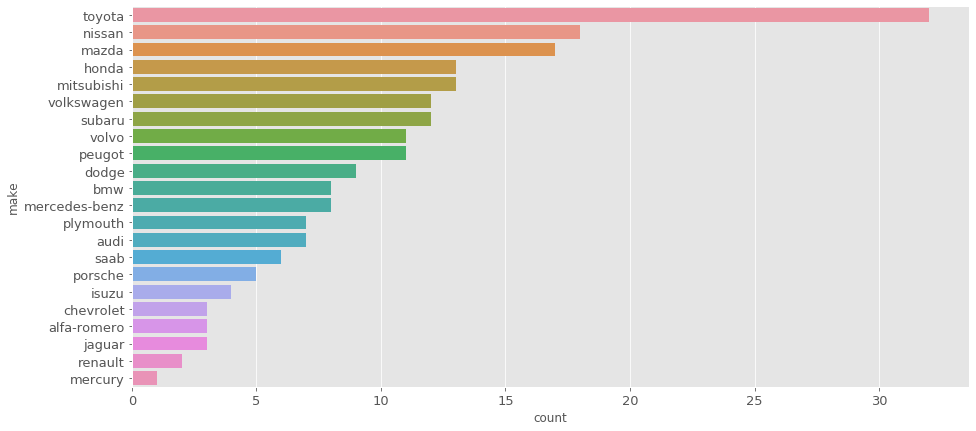

In [41]:
plt.figure(figsize=(15,7));
g = sns.countplot(y='make', data=df, order = df['make'].value_counts().index);

- Most of the cars in the dataset are manufactured by **Toyota** followed by **Nissan** and other companies.

### Let's check the relationship between the 'horsepower' and 'price' of the car.

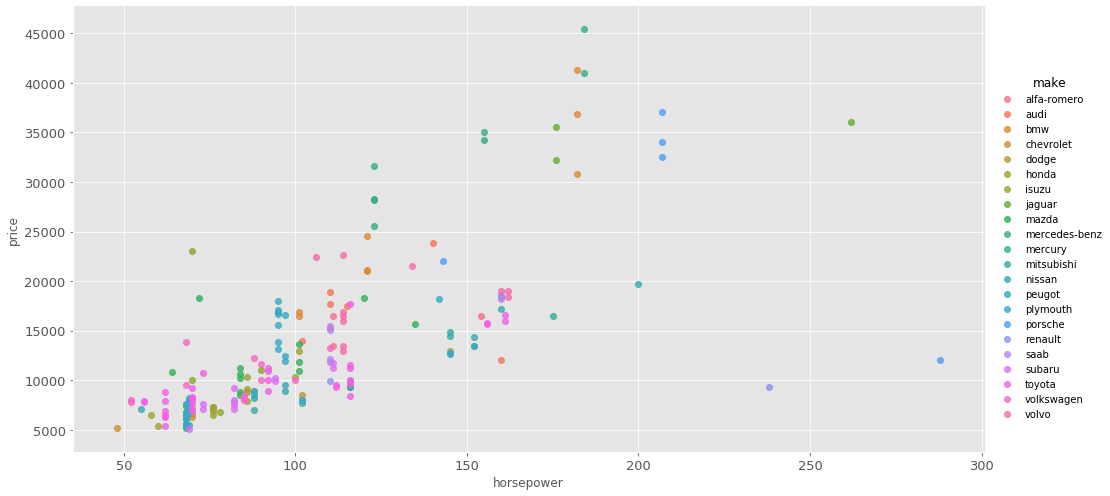

In [7]:
sns.lmplot(x='horsepower', y='price', hue='make', data=df, fit_reg=False, size=7, aspect=2);

- **Horsepower** seems to have **positive correlation** with **price** i.e, as horsepower increases price of the car increases too.
- There are certain cars from **Renault** and **Porsche** who have **high** horsepower at a very **low** price.

### Let's check the mpg consumed by each body-style for highway as well as the cities.

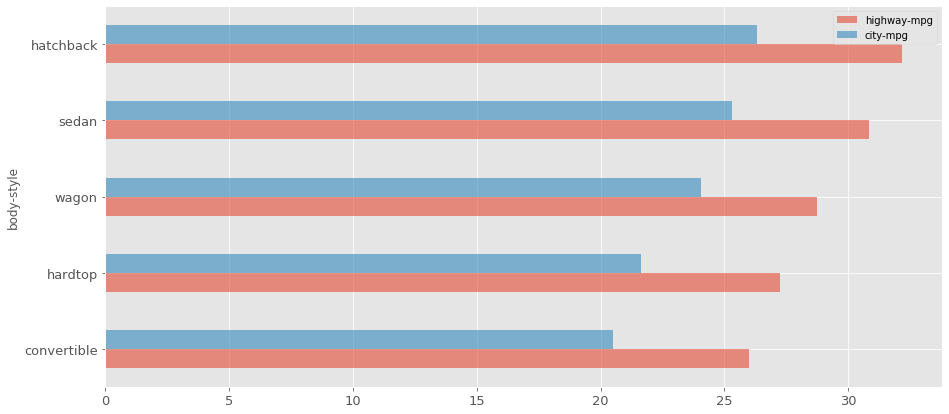

In [132]:
df.groupby(['body-style'])['highway-mpg','city-mpg'].mean().sort_values(by='highway-mpg').plot(kind='barh', figsize=(15,7), alpha=0.6, y)

- **Hatchback** cars seems to consume **more** miles per gallon on average as compared to other cars.

### Pie chart of fuel types.

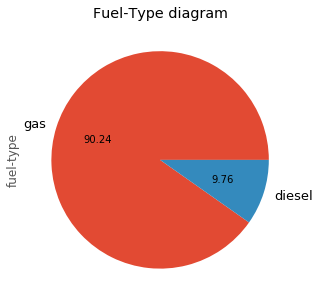

In [193]:
df['fuel-type'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f');
plt.title('Fuel-Type diagram');

- **Majority** of the vehicles run on **gas**.

### Let's group the car companies by their preferred body-styles.

In [177]:
df.groupby('make')['body-style'].agg(lambda x: x.mode()[0])

make
alfa-romero      convertible
audi                   sedan
bmw                    sedan
chevrolet          hatchback
dodge              hatchback
honda              hatchback
isuzu                  sedan
jaguar                 sedan
mazda              hatchback
mercedes-benz          sedan
mercury            hatchback
mitsubishi         hatchback
nissan                 sedan
peugot                 sedan
plymouth           hatchback
porsche              hardtop
renault            hatchback
saab               hatchback
subaru                 sedan
toyota             hatchback
volkswagen             sedan
volvo                  sedan
Name: body-style, dtype: object

- It is no suprise that high-end companies like **BMW, Audi, Jaguar** and **Mercedes-benz** are more inclined towards manufacturing luxurious **sedan** cars.

### Split the categorical and continous features.

In [198]:
dtypes = df.dtypes
cols_numeric = dtypes[dtypes != object].index.tolist()
cols_categ = df.select_dtypes(exclude=np.number).columns.tolist()

col_nunique = dict()

for col in cols_numeric:
    col_nunique[col] = df[col].nunique()
    
col_nunique = pd.Series(col_nunique)

cols_discrete = col_nunique[col_nunique<13].index.tolist()
cols_continuous = col_nunique[col_nunique>=13].index.tolist()

print(len(cols_numeric),'numeric columns, of which',
      len(cols_continuous),'are continuous and',
      len(cols_discrete),'is discrete.')

12 numeric columns, of which 11 are continuous and 1 is discrete.


### Distribution of continous features against Price.

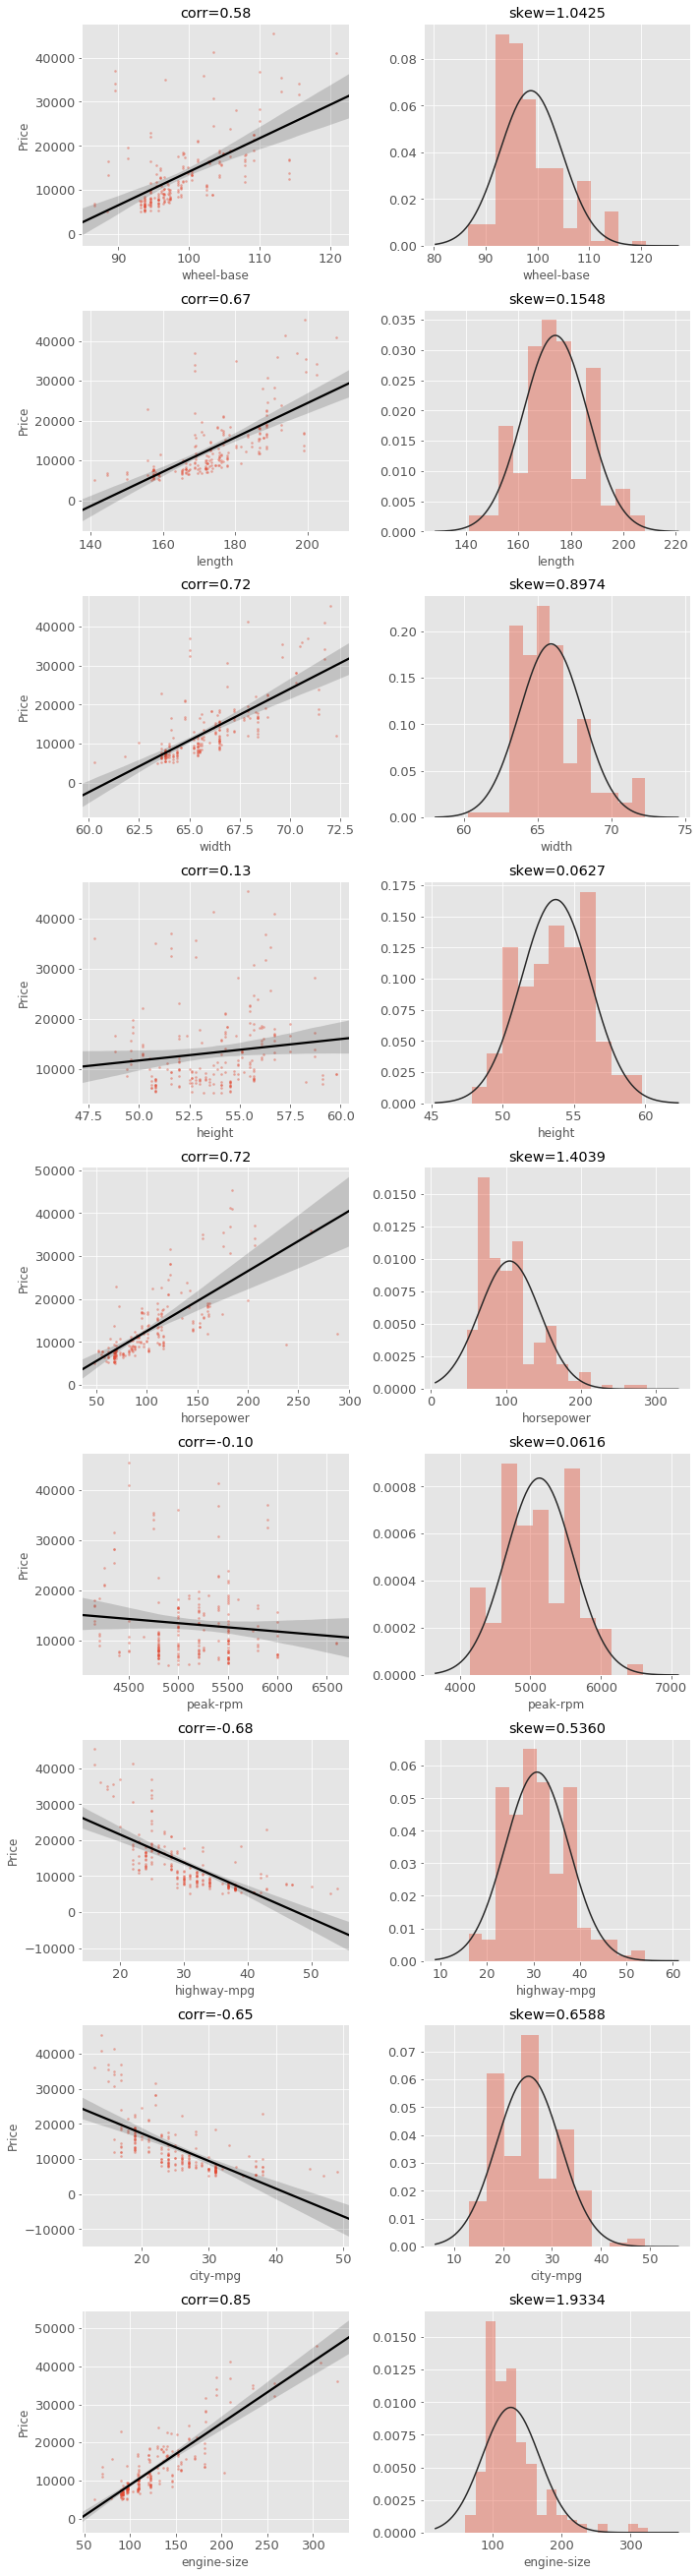

In [9]:
fcols = 2
frows = len(cols_continuous)
plt.figure(figsize=(5*fcols,4*frows));

i=0
for col in cols_continuous[:-1]:
    i+=1
    ax=plt.subplot(frows,fcols,i);
    sns.regplot(x=col, y='price', data=df, ax=ax,
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col);
    plt.ylabel('Price');
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(df[col], df['price'])[0][1]));
    
    i+=1
    ax=plt.subplot(frows,fcols,i);
    sns.distplot(df[col].dropna() , fit=stats.norm, kde=False);
    plt.title('skew='+'{:.4f}'.format(stats.skew(df[col])))
    plt.xlabel(col);
plt.tight_layout()

 - **Engine-sizes** and **horsepower** are two major components that determine how powerfull a car is, so it is very intuitive that larger **engine-size** and **higher horsepower** will lead to an **increase** in the **price** of a car which is also evident by the strong positive correlation.
 - Cars that consume **low mpg** on **highways** as well as in **cities** have **higher Price.** Also as the **mpg** consumed **increases, price decreases.**
 - **Width** of an automobile also plays a major role in deciding its **price** as more **width** leads to longer cars which inturn **increases** the comfort-level of the customer in the car. Due to this reason, as the **width** of the car **increases** the **price** also **increases**.

### Distribution of categorical features against Price.

*Note: `make` column is considered seperately as it has too many categories*

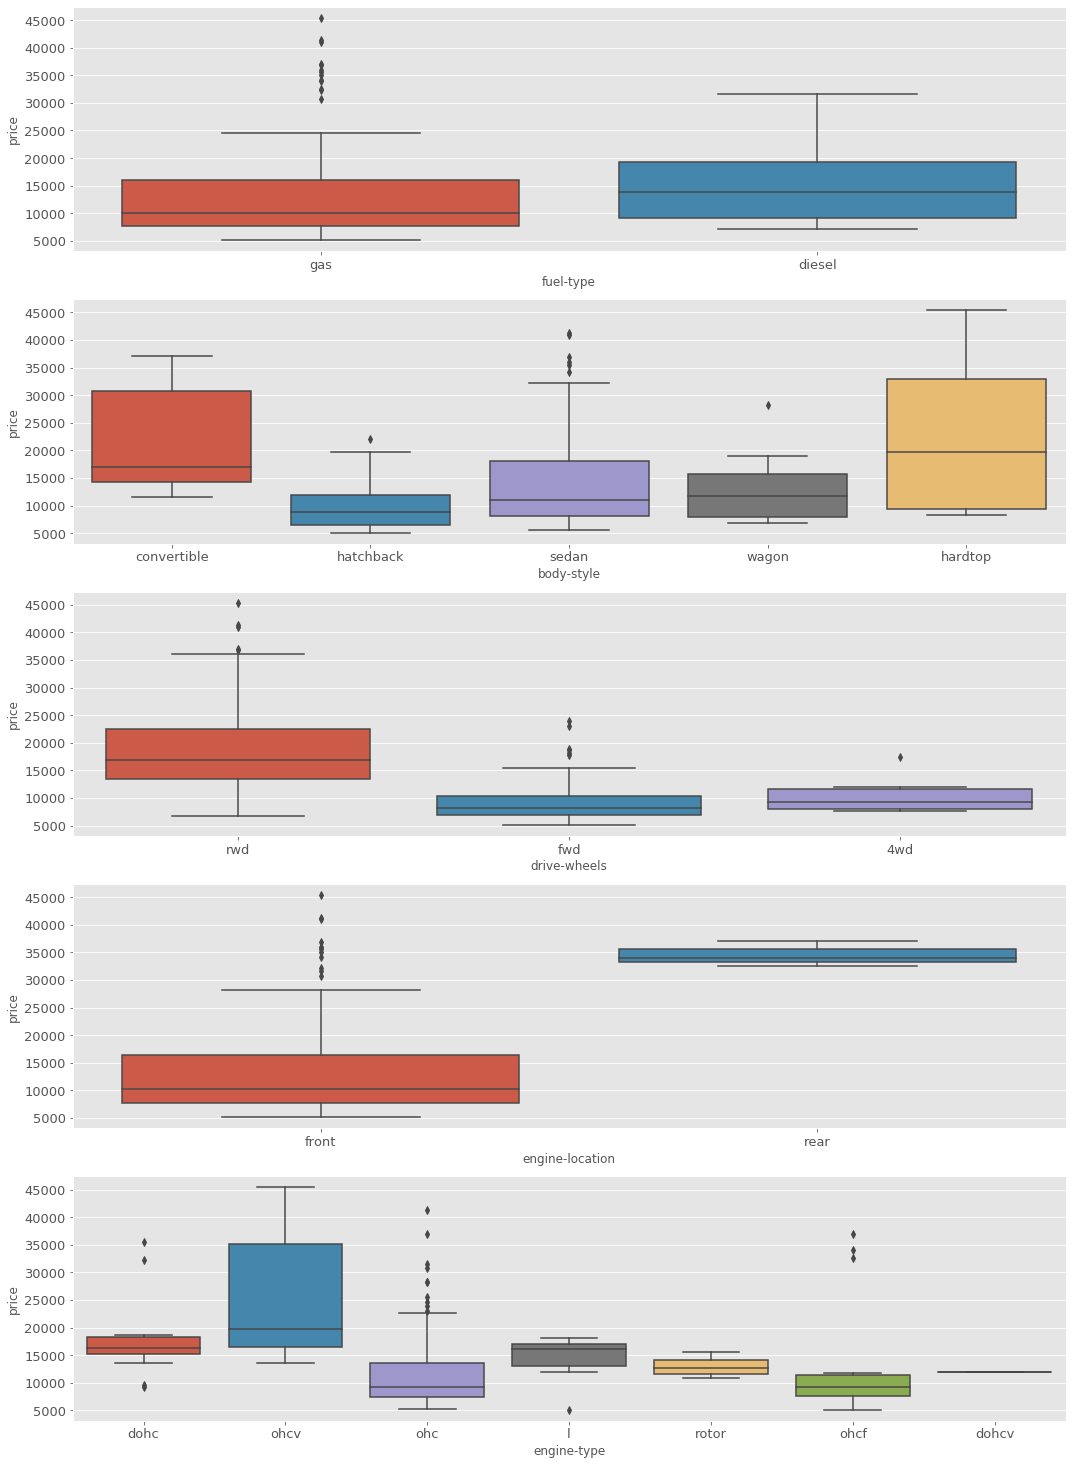

In [47]:
fcols = 1
frows = len(cols_categ)
plt.figure(figsize=(15,4*frows));

for i,col in enumerate(cols_categ[1:]):
    plt.subplot(frows,fcols,i+1);
    sns.boxplot(df[col],df['price']);
plt.tight_layout()

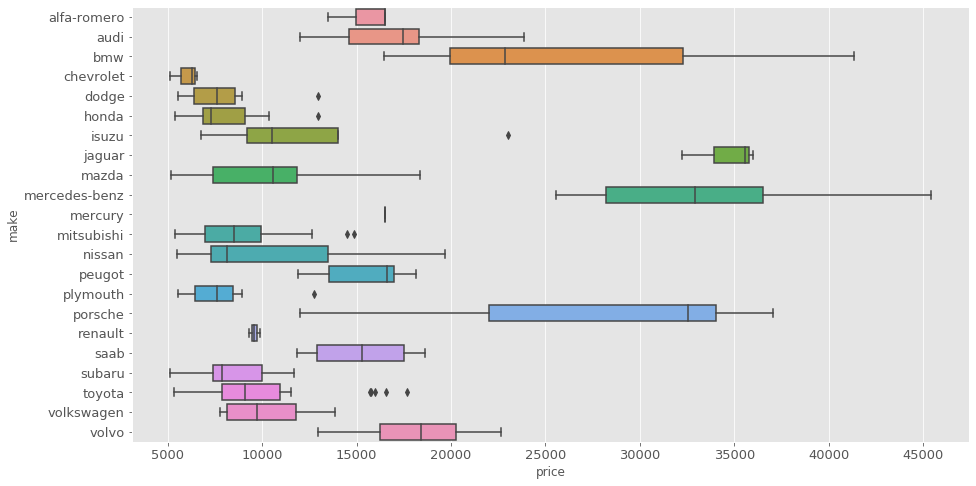

In [207]:
plt.figure(figsize=(15,8));
sns.boxplot(x='price', y='make',data=df);

 - Even though **majority** of the cars run on **gas** (evident from pie chart), cars that use **diesel** have **higher price** on average.
 - **Hardtops** and **Convertibles** which are considered the premium cars have **higher price** than other models. Although there are a few **sedan** cars which have **higher price** than **convertibles.**
 - **Hatchback** cars the **cheapest** ones in the market.
 - In this dataset, cars that have **rear-engines** are only manufactured by **Porsche** which might be the reason for their **higher price**.
 - **Jaguar** is one of the companies that manufactures least number of cars and yet it produces the most expensive cars followed by **Mercedes-benz** and **Porsche.**
 - Even though **majority** of the cars are manufactured by **Toyota**, it ranks way **below average**. 
 - **Chevrolet** has the **lowest price** as compared to other automobile prices.

### Checking the distribution of the target (Price).

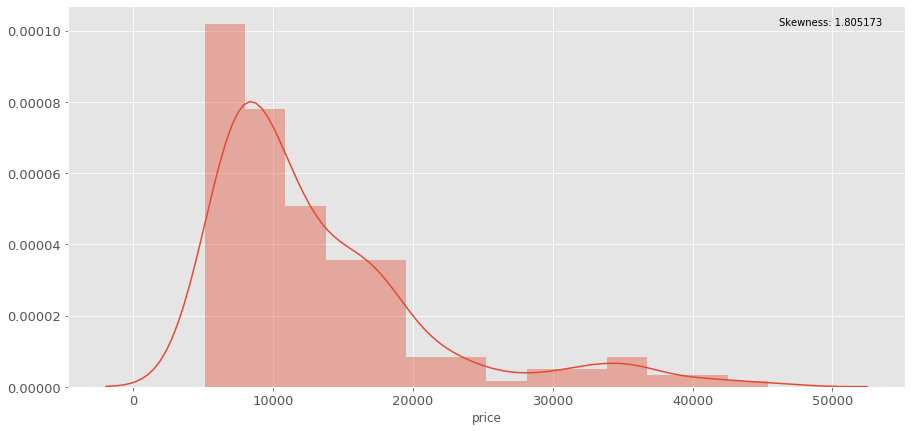

In [5]:
fig, ax = plt.subplots(figsize=(15, 7));
sns.distplot(df['price'], ax=ax);
ax.text(x=0.85, y=0.95, transform=ax.transAxes, s="Skewness: %f" % df['price'].skew());

 - As suspected, **target** is **right skewed.**

### Pearson correlation of all the features in a heatmap.

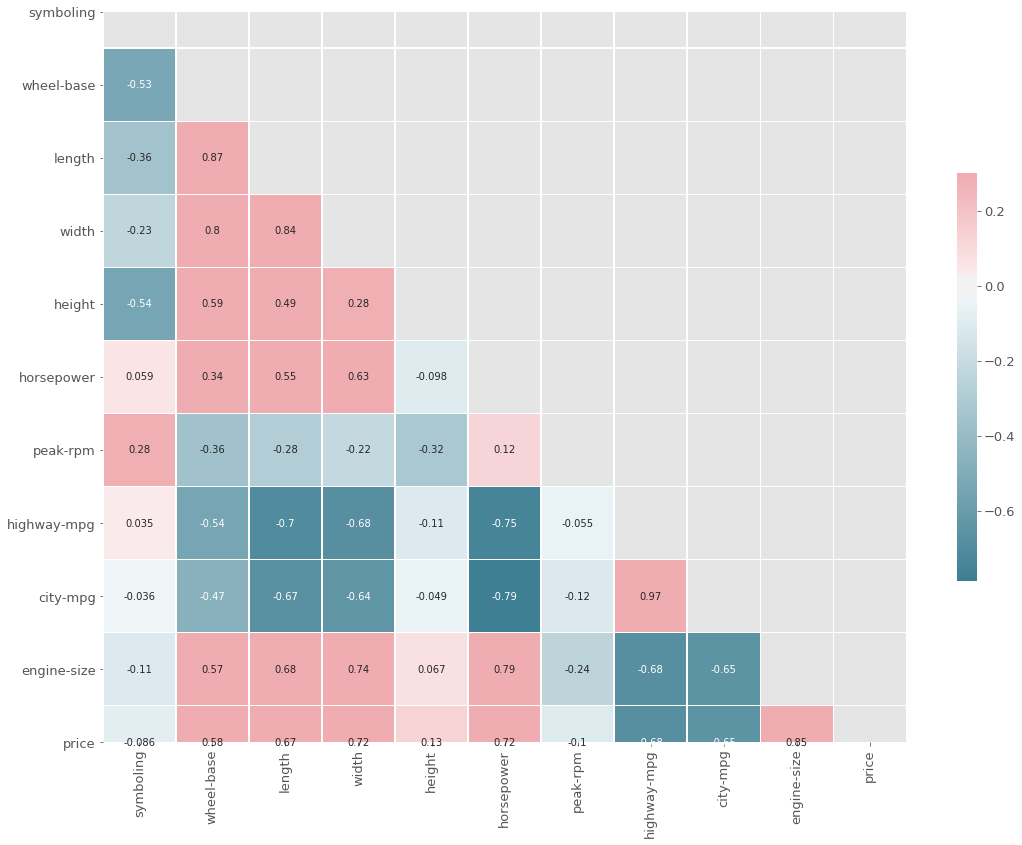

In [13]:
corr = df.corr()
corr.head()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Imputing the missing values of `normalized-losses` column by its mean.

In [220]:
df = df.replace('?', 'NaN')
numeric_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['normalized-losses'] = numeric_imp.fit_transform(df[['normalized-losses']])

In [221]:
df['normalized-losses'].isnull().sum()

0

### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [242]:
df['area'] = df['height'] * df['width']

### Split the Independent features and target(`price`) variable into X and y. 

In [1030]:
X = df.drop('price', axis=1)
y = df['price']

### Label encode ordinal categories and one-hot encode nominal categories.

In [1033]:
# Label Encode ordinal
le = LabelEncoder()
X['symboling'] = le.fit_transform(X['symboling'])
X['make'] = le.fit_transform(X['make'])

# OHE nominal
X = pd.get_dummies(X, columns=cols_categ[1:])

### Split into training and testing sets.

In [1034]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Training phase creation.

In [776]:
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [777]:
def train_model(model, param_grid=[], X=X_train, y=y_train, 
                splits=5, repeats=5):

    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring=rmse_scorer,
                               verbose=1, return_train_score=True)

        # search the grid
        gsearch.fit(X,y)

        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_

        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring=rmse_scorer, cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid    
    n_outliers = sum(abs(z)>3)
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results

In [778]:
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

### Ridge (tuning and training)

Fitting 25 folds for each of 90 candidates, totalling 2250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:   15.8s finished


----------------------
Ridge(alpha=0.11, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=69, solver='auto', tol=0.001)
----------------------
score= 0.8999665628196465
rmse= 2458.902142805217
cross_val: mean= 3332.4853689494075 , std= 750.4266998339555


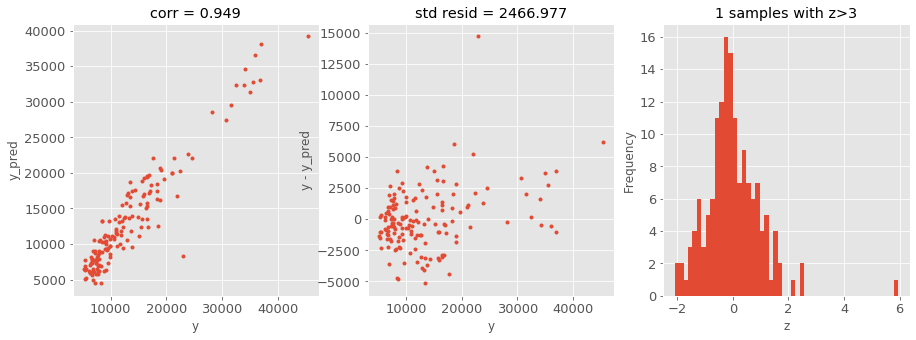

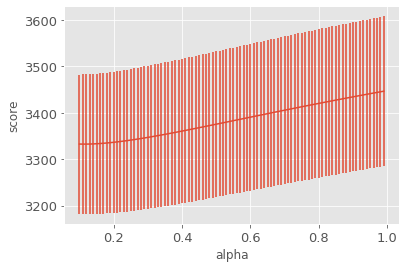

In [856]:
model = 'Ridge'

opt_models[model] = Ridge(random_state=69)
alph_range = np.arange(0.1,1,0.01)
param_grid = {'alpha': alph_range}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid=param_grid, splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score');

### Decision Tree (tuning and training)

Fitting 5 folds for each of 780 candidates, totalling 3900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3900 out of 3900 | elapsed:   25.8s finished


----------------------
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=20, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=40,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=69, splitter='best')
----------------------
score= 0.8305468747117899
rmse= 3200.320262304032
cross_val: mean= 3299.402649225611 , std= 1181.7512405282075


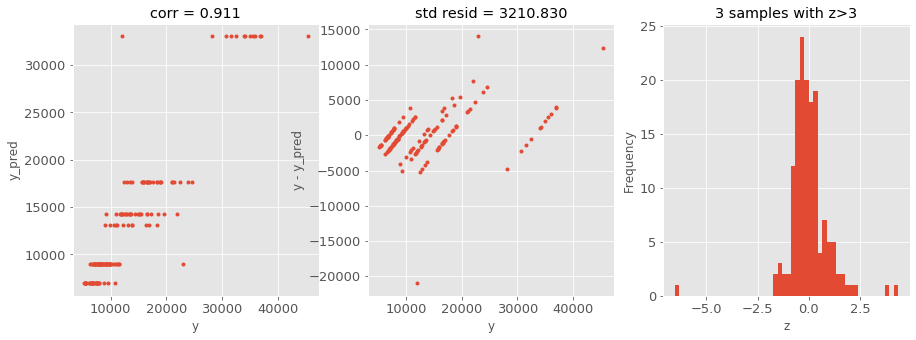

In [855]:
model = 'DecisionTree'
opt_models[model] = DecisionTreeRegressor(random_state=69)

param_grid = {'max_depth':np.arange(1,7),
              'max_features':np.arange(8,34,2),
              'min_samples_split':np.arange(40,60,2)}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=5, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

### Random Forest (tuning and training)

Fitting 5 folds for each of 154 candidates, totalling 770 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 770 out of 770 | elapsed:  3.6min finished


----------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=12, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=69, verbose=0, warm_start=False)
----------------------
score= 0.9479500475368944
rmse= 1773.694495545559
cross_val: mean= 3367.540420253238 , std= 605.5621368601318


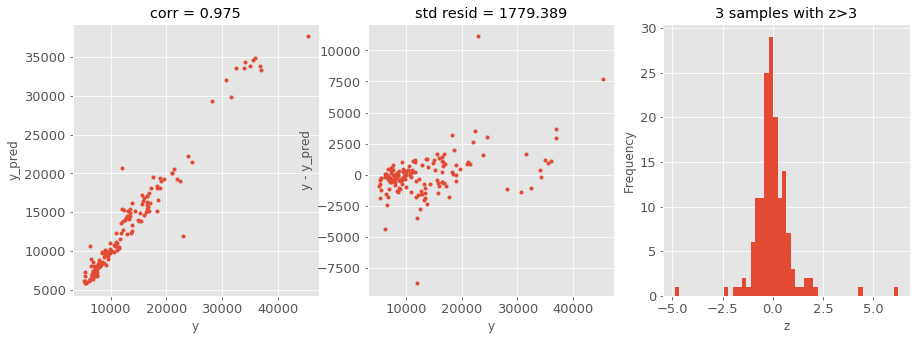

In [1036]:
model = 'RandomForest'
opt_models[model] = RandomForestRegressor(random_state=69)

param_grid = {'n_estimators':[100,200],
              'max_features':np.arange(10,32,2),
              'min_samples_split':np.arange(2,16,2)}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=5, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

### Since Random Forest yeilds most promising results let's test it on the test set.

In [1047]:
# best one
rf_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=12, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=69, verbose=0, warm_start=False)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)
test_score = rf_reg.score(X_test, y_test)
test_score

0.9178940136630641

- **Random Forest** does very well in predicting the price of an automobile and provides an **R2 score** of **91%.**